29 29
top senders:  ['Abedin, Huma', 'Mills, Cheryl D', 'Sullivan, Jacob J', 'Blumenthal, Sidney', 'Jiloty, Lauren C', 'Reines, Philippe I', 'Valmoro, Lona J', 'Slaughter, Anne-Marie', 'Verma, Richard R', 'Verveer, Melanne S', 'Muscatine, Lissa', 'McHale, Judith A', 'Ebeling, Betsy', 'Talbott, Strobe', 'Hanley, Monica R', 'Russo, Robert V', 'Balderston, Kris M', 'Blair, Cherie', 'Crowley, Philip J', 'Fuchs, Michael H']
top receivers:  ['Abedin, Huma', 'Mills, Cheryl D', 'Sullivan, Jacob J', 'Jiloty, Lauren C', 'Valmoro, Lona J', 'Reines, Philippe I', 'Blumenthal, Sidney', 'Hanley, Monica R', 'Slaughter, Anne-Marie', 'Verma, Richard R', 'Russo, Robert V', 'Verveer, Melanne S', 'Balderston, Kris M', 'Muscatine, Lissa', 'Talbott, Strobe', 'Crowley, Philip J', 'McHale, Judith A', 'Campbell, Kurt M', 'Steinberg, James B', 'Lew, Jacob J']


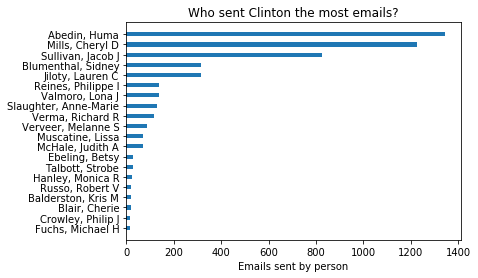

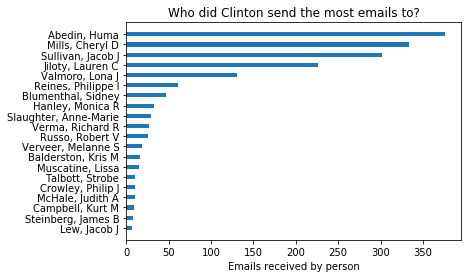

In [2]:
#author vishwanath akuthota
import sqlite3
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

sql_conn = sqlite3.connect('database.sqlite')

data = sql_conn.execute('SELECT MetadataTo, MetadataFrom FROM Emails WHERE MetadataTo LIKE "H"')

pseudonyms = ["sbwhoeop","pir","millscd@state.gov","abedinh@state.gov",
              "cheryl.mills","mills, cheryl","jake.sullivan","sullivan, jake", 
              "mills, chery","sullivanjj@state.gov","jilotylc@state.gov","pverveer",
              "pverveer","valmorolj@state.gov","preines","hanleymr@state.gov",
              "slaughtera@state.gov","vermarr@state.gov","russorv@state.gov","balderstonkm@state.gov",
              "muscatinel@state.gov","reinesp@state.gov","crowleypj@state.gov","stalbott",
              "mchaleja@state.gov","campbellkm@state.gov","verveerms@state.gov","steinbergjb@state.gov",
              "lewjj@state.gov"]
              
realNames = ["Blumenthal, Sidney","Reines, Philippe I","Mills, Cheryl D","Abedin, Huma",
         "Mills, Cheryl D","Mills, Cheryl D","Sullivan, Jacob J","Sullivan, Jacob J",
         "Mills, Cheryl D","Sullivan, Jacob J","Jiloty, Lauren C","Verveer, Melanne S",
         "Verveer, Melanne S","Valmoro, Lona J","Reines, Philippe I","Hanley, Monica R",
         "Slaughter, Anne-Marie","Verma, Richard R","Russo, Robert V","Balderston, Kris M",
         "Muscatine, Lissa","Reines, Philippe I","Crowley, Philip J","Talbott, Strobe",
         "McHale, Judith A","Campbell, Kurt M","Verveer, Melanne S","Steinberg, James B",
         "Lew, Jacob J"]

         
print(len(pseudonyms), len(realNames))


otherSenders = []

#No hiding behind fake names!
for email in data:
    if email[1] != '':
        if email[1].lower() in pseudonyms:
            otherSenders.append(realNames[pseudonyms.index(email[1].lower())])
        else:
            otherSenders.append(email[1])

c = Counter(otherSenders)
topSenders = (c.most_common(20))


names = [x[0] for x in topSenders]
y_pos = np.arange(0, len(names)*2, 2)
#y_pos = np.arange(len(names))
values = [x[1] for x in topSenders]

fig1 = plt.figure()
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, names)
plt.gca().invert_yaxis()
plt.axis('tight')
#plt.tick_params(axis="y",labelsize="10")
plt.xlabel('Emails sent by person')
plt.title('Who sent Clinton the most emails?')
plt.savefig("1.ClintonSenders.png",bbox_inches='tight')

print("top senders: ", names)
#####################################

data = sql_conn.execute('SELECT MetadataTo, MetadataFrom FROM Emails WHERE MetadataFrom LIKE "H"')

otherReceivers = []

for email in data:
    if email[0] != '':
        if email[0].lower() in pseudonyms:
            otherReceivers.append(realNames[pseudonyms.index(email[0].lower())])
        else:
            otherReceivers.append(email[0])

c = Counter(otherReceivers)
topReceivers = (c.most_common(20))

names = [x[0] for x in topReceivers]
y_pos = np.arange(0, len(names)*2, 2)
#y_pos = np.arange(len(names))
values = [x[1] for x in topReceivers]

fig1 = plt.figure()
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, names)
plt.gca().invert_yaxis()
plt.axis('tight')
#plt.tick_params(axis="y",labelsize="10")
plt.xlabel('Emails received by person')
plt.title('Who did Clinton send the most emails to?')
plt.savefig("2.ClintonReceivers.png",bbox_inches='tight')

print("top receivers: ", names)